Scatter plot of spatial and vertical data adjustments
======

Import custom modules for working with model and AWS data
----

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# from model import Model
from GCNet import GCNet

Utility functions
---

In [2]:
def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val                                           #get the ^

def getMarker(i):
    # Use modulus in order not to have the index exceeding the lenght of the list (markers)
    return r"$"+markers[i % len(markers)]+"$"
#     return r"$\mathregular{"+markers[i % len(markers)]+"}$"

def getColor(i):
    # Use modulus in order not to have the index exceeding the lenght of the list (colors)
    return colors[i % len(colors)]

Global settings
---

In [3]:
ens = -1  # ensemble number, 1-based (or -1 for ensemble average)

Load AWS metadata
----

In [4]:
A = GCNet("site_info.nc")
A.loadMeta()
nSites = A.getNSites()

Load derived site info
-----

In [5]:
df = pd.read_pickle('cesmle_site_info.pkl' )
vDryAdj = df['Dry T Adj'].astype("float")
vMoistAdj = df['Moist T Adj'].astype("float")
awsNames = df['Site name']
# df

Load closest and interpolated model data
-----

In [6]:
suff = "19960101-20051231"
fnClosest = 'cesmle_tas_closest_'+suff+'.nc'
fnInterp  = 'cesmle_tas_interp_'+suff+'.nc'

ncClosest = Dataset( fnClosest, 'r' )
ncInterp  = Dataset( fnInterp, 'r' )

xClosest = ncClosest.variables['tas']
xInterp = ncInterp.variables['tas']

Select a specific ensemble or calculate ensemble average
---

In [7]:
nens, nrow, ncol = xInterp.shape
if ens < 0:  # use ensemble average
    xInterp = np.average( xInterp, axis=0)
    xClosest = np.average( xClosest, axis=0)
else:
    ens = ens - 1  # adjust to zero-based indexing
    xInterp = xInterp[ens,:,:]
    xClosest = xClosest[ens,:,:]

Calculate rms of (closest, interpolated) model data
-----

In [9]:
hAdj = np.zeros( ncol )
for awsIX in range( ncol ):
    x = xClosest[:,awsIX]
    y = xInterp[:,awsIX]
    rms = rmse(x,y)
    ix = awsIX + 1
    print "%02d %.2f" % (ix, rms)
    hAdj[awsIX] = rms

01 0.82
02 0.61
03 0.43
04 0.38
05 0.60
06 0.24
07 0.43
08 0.09
09 1.26
10 0.25
11 1.54
12 0.02
13 1.63
14 0.11
15 0.08
16 2.52
17 0.22
18 1.13
19 0.48
20 0.51
21 0.65
22 0.97
23 0.18


Define markers and colors
---

In [10]:
# ------------------------------------------------------------
# use this if you want to revert to using letters as markers
# startLetter = 97
# endLetter = startLetter + len(hAdj)
# markers = [chr(x) for x in range(startLetter, endLetter)]
# ------------------------------------------------------------

# use symbols as markers (repeats through list of six)
# search on "mathtext" for the complete set of symbols etc
markerList = [ '\\bullet', '\diamond', '\circ', '\\vartriangleleft','\\vartriangleright','\\ast']
markers = []
for j in range(4):
    for k in markerList:
        markers.append(k)

# list of colors to cycle        
colorList = ['black','red','blue','green']
tC = [ [ c, c, c, c, c, c ] for c in colorList]
colors = [item for sublist in tC for item in sublist]  # flatten the nested list

Plot horizontal and vertical adjustments
----

-9.9 5.5


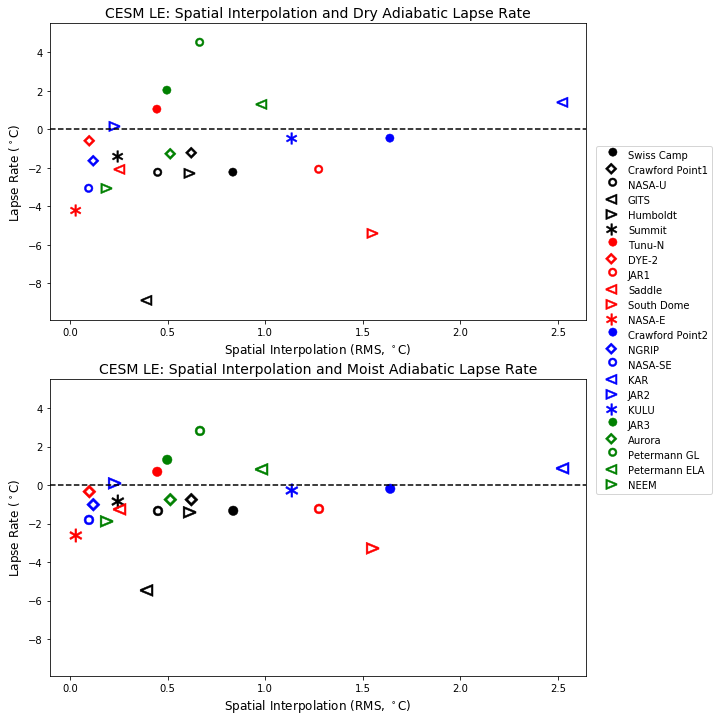

In [25]:
P = np.hstack( (vDryAdj, vMoistAdj ) )
yMin = np.floor( np.min( P ) ) * 1.1
yMax = np.ceil( np.max( P ) ) * 1.1
print yMin, yMax

fig1 = plt.figure( figsize=(12,12) )
ax = plt.subplot( 211 )
for i, mi in enumerate(markers):
    if i >= ncol:
        break
    m = getMarker(i)
    c = getColor(i)
    ax.plot( hAdj[i], vDryAdj[i], markersize=13, marker=m, color=c, \
             label=awsNames[i], linestyle='none', markeredgewidth=0.5)

plt.axhline(linestyle='dashed', color='black')

# adjust size of plot so there's room for legend outside    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# titles
ax.set_title('CESM LE: Spatial Interpolation and Dry Adiabatic Lapse Rate',fontsize=14)
plt.xlabel('Spatial Interpolation (RMS, $^\circ$C)',fontsize=12)
plt.ylabel('Lapse Rate ($^\circ$C)',fontsize=12)

# legend
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0));

axes = plt.gca()
axes.set_ylim([yMin,yMax]);

# fig2 = plt.figure( figsize=(12,8) )
ax = plt.subplot( 212 )
for i, mi in enumerate(markers):
    if i >= ncol:
        break
    m = getMarker(i)
    c = getColor(i)
    ax.plot( hAdj[i], vMoistAdj[i], markersize=15, marker=m, color=c, \
             label=awsNames[i], linestyle='none', markeredgewidth=0.5)

plt.axhline(linestyle='dashed', color='black')

# adjust size of plot so there's room for legend outside    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# title
ax.set_title('CESM LE: Spatial Interpolation and Moist Adiabatic Lapse Rate',fontsize=14)
plt.xlabel('Spatial Interpolation (RMS, $^\circ$C)',fontsize=12)
plt.ylabel('Lapse Rate ($^\circ$C)',fontsize=12)

# legend
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

axes = plt.gca()
axes.set_ylim([yMin,yMax]);